<h1>Air Quality and its Effects</h1>
<h3>ST1510 Programming for Data Analytics</h3>
<h2>By: Rejey Ezekiel Jeyakuamar</h2>
<hr>
<h3>Problem Statement</h3>
To what extent does air quality in Singapore impact public health, and how can we identify correlations between air quality parameters and health indicators?

<hr>
<h5>Datasets</h5>
<li>Air pollutant, Particulate Matter (DF1) (data.gov.sg)
</li>
<li>Top 10 Health Conditions of Hospitalization (DF2) (data.gov.sg)
</li>
<li>Principal of Death (DF3) (data.gov.sg)
</li>
<li>Total Number of Deaths (DF4) (data.gov.sg)</lki>

Importing Libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter


Importing Datafiles

In [81]:
df1 = pd.read_csv('AirPollutantParticulateMatterPM2.5.csv',index_col='year')
df2 = pd.read_csv('Top10ConditionsofHospitalisation.csv',index_col='year')
df3 = pd.read_csv('PrincipalCausesofDeath.csv')
df4 = pd.read_csv('TotalNumberofDeaths.csv',index_col='year')

<h3>Viewing  the Dataset as a dataframe.</h3>

In [82]:
df1

,pm2.5_mean
year,
2002,23
2003,19
2004,21
2005,21
2006,23
2007,19
2008,16
2009,19
2010,17


In [83]:
df2

,rank,icd,classification,disease_condition,percentage_discharges
year,,,,,
1990,1,ICD9,800-999,"Accidents, poisoning & violence",8.3
1990,2,ICD9,140-208,Cancer,3.9
1990,3,ICD9,640-648,Complications related to pregnancy,3.5
1990,4,ICD9,490-493 & 496,Chronic obstructive lung disease,3.1
1990,5,ICD9,410-414,Ischaemic heart diseases,2.8
...,...,...,...,...,...
2021,6,ICD10AM,L00-L08,Infections of skin & subcutaneous tissue,2.1
2021,7,ICD10,I60-I69,Cerebrovascular diseases (Including stroke),2.0
2021,8,ICD10AM,A00-A09,Intestinal infectious diseases,1.9


In [84]:
df3

,year,rank,icd,classification,disease_condition,percentage_deaths
0,2006,1,ICD9,140-208,Cancer,28.5
1,2006,2,ICD9,410-414,Ischaemic Heart Disease,18.5
2,2006,3,ICD9,480-486,Pneumonia,13.7
3,2006,4,ICD9,430-438,Cerebrovascular Disease (including stroke),8.9
4,2006,5,ICD9,E800-E999,"Accidents, Poisoning & Violence",6.3
...,...,...,...,...,...,...
167,2022,6,ICD10,V01-Y89,External causes of morbidity and mortality,3.3
168,2022,7,ICD10,"N00-N07, N17-N19, N25-N27","Nephritis, nephrotic syndrome & nephrosis",2.9
169,2022,8,ICD10,"I00-I09, I26-I51",Other heart diseases,2.3
170,2022,9,ICD10,N39.0,Urinary tract infection,2.1


In [85]:
df4

,no_of_deaths
year,
2006,16393
2007,17140
2008,17222
2009,17101
2010,17610
2011,18027
2012,18481
2013,18938
2014,19393


<h3>Viewing the Datatype, Uniquenes of each columns and its index of each dataframe.</h3>

In [86]:
def Information(df):
    print(f"{'*' * 40}")
    print(f"There are {len(df)} rows and {len(df.columns)} columns in the data file.\n")

    print("The names of the columns are: ")
    col = df.columns
    for Counter,Col in enumerate(col):
        result = "Not Numeric" if col.astype(str).str.isnumeric().all() else "Numeric"
        print(f'{Counter + 1}. {Col}')
        print(f'- {Col} Is {result}')
        try:
            print(f'- Unique Number of {Col} Column: {len((df1[Col]).unique())}\n')
        except:
            print("Has Unique Columns")


    print(f'Unique Number of Years Index: {len((df.index).unique())}')
    print(f"There are {df.index.nunique()} years of data ranging from {df.index.min()} to {df.index.max()}")

In [87]:
dataframes = [df1,df2,df3,df4]

for i in dataframes:
    Information(i)

****************************************
There are 21 rows and 1 columns in the data file.

The names of the columns are: 
1. pm2.5_mean
- pm2.5_mean Is Numeric
- Unique Number of pm2.5_mean Column: 12

Unique Number of Years Index: 21
There are 21 years of data ranging from 2002 to 2022
****************************************
There are 320 rows and 5 columns in the data file.

The names of the columns are: 
1. rank
- rank Is Numeric
Has Unique Columns
2. icd
- icd Is Numeric
Has Unique Columns
3. classification
- classification Is Numeric
Has Unique Columns
4. disease_condition
- disease_condition Is Numeric
Has Unique Columns
5. percentage_discharges
- percentage_discharges Is Numeric
Has Unique Columns
Unique Number of Years Index: 32
There are 32 years of data ranging from 1990 to 2021
****************************************
There are 172 rows and 6 columns in the data file.

The names of the columns are: 
1. year
- year Is Numeric
Has Unique Columns
2. rank
- rank Is Numeric
Has

<h3>Viewing the datatype of the dataset.</h3>

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2002 to 2022
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   pm2.5_mean  21 non-null     int64
dtypes: int64(1)
memory usage: 892.0 bytes


In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 1990 to 2021
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rank                   320 non-null    int64  
 1   icd                    320 non-null    object 
 2   classification         320 non-null    object 
 3   disease_condition      320 non-null    object 
 4   percentage_discharges  320 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.1+ KB


In [90]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               172 non-null    int64  
 1   rank               172 non-null    int64  
 2   icd                172 non-null    object 
 3   classification     172 non-null    object 
 4   disease_condition  172 non-null    object 
 5   percentage_deaths  172 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 8.2+ KB


In [91]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2006 to 2022
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   no_of_deaths  17 non-null     int64
dtypes: int64(1)
memory usage: 828.0 bytes


<h3>Sorting the Top 10 Health conditions by <b>percentage_discharges.</b></h3>

In [92]:
df2_sorted = df2.sort_values(by='percentage_discharges', ascending=False)
df2_sorted

,rank,icd,classification,disease_condition,percentage_discharges
year,,,,,
2021,1,ICD10AM,S00-T98,"Accident, poisoning and violence",9.8
2009,1,ICD9,800-999,"Accidents, poisoning & violence",9.5
2010,1,ICD9,800-999,"Accidents, poisoning & violence",9.5
2008,1,ICD9,800-999,"Accidents, poisoning & violence",9.4
2007,1,ICD9,800-999,"Accidents, poisoning & violence",9.2
...,...,...,...,...,...
1990,8,ICD9,"393-398, 402, 415- 429",Other heart diseases,1.5
1992,10,ICD9,210-229,Benign neoplasms,1.5
1994,10,ICD9,001-009,Intestinal infectious diseases,1.4


<h3>Sorting the Air pollutant particle by <b>pm2.5_mean.</b></h3>

In [93]:
df1_sorted = df1.sort_values(by='pm2.5_mean', ascending=False)
df1_sorted

,pm2.5_mean
year,
2015,24
2002,23
2006,23
2004,21
2005,21
2013,20
2003,19
2012,19
2009,19


<h3>Making the dataset only contain Important Values.</h3>

In [94]:
df2 = df2[["disease_condition","percentage_discharges"]]
df3 = df3[['year','disease_condition','percentage_deaths']]
df3

,year,disease_condition,percentage_deaths
0,2006,Cancer,28.5
1,2006,Ischaemic Heart Disease,18.5
2,2006,Pneumonia,13.7
3,2006,Cerebrovascular Disease (including stroke),8.9
4,2006,"Accidents, Poisoning & Violence",6.3
...,...,...,...
167,2022,External causes of morbidity and mortality,3.3
168,2022,"Nephritis, nephrotic syndrome & nephrosis",2.9
169,2022,Other heart diseases,2.3
170,2022,Urinary tract infection,2.1


<h3>Seeing if the dataset has any missing values</h3>

In [95]:
print(f'Missing Values in dataset (Amount):\n{pd.isnull(df1).sum()}\n')
print(f"Total Missing Values: {(pd.isnull(df1).sum()).sum()}")

Missing Values in dataset (Amount):
pm2.5_mean    0
dtype: int64

Total Missing Values: 0


In [96]:
print(f'Missing Values in dataset (Amount):\n{pd.isnull(df2).sum()}\n')
print(f"Total Missing Values: {(pd.isnull(df2).sum()).sum()}")

Missing Values in dataset (Amount):
disease_condition        0
percentage_discharges    0
dtype: int64

Total Missing Values: 0


In [97]:
print(f'Missing Values in dataset (Amount):\n{pd.isnull(df3).sum()}\n')
print(f"Total Missing Values: {(pd.isnull(df3).sum()).sum()}")

Missing Values in dataset (Amount):
year                 0
disease_condition    0
percentage_deaths    0
dtype: int64

Total Missing Values: 0


In [98]:
print(f'Missing Values in dataset (Amount):\n{pd.isnull(df3).sum()}\n')
print(f"Total Missing Values: {(pd.isnull(df3).sum()).sum()}")

Missing Values in dataset (Amount):
year                 0
disease_condition    0
percentage_deaths    0
dtype: int64

Total Missing Values: 0


<h3>Data Cleansing.</h3>
<li>Removing irrelevant rows in dieseas condition and only having relevant rows.</li>

In [99]:
print((df2['disease_condition']).unique())
print((df3['disease_condition']).unique())

['Accidents, poisoning & violence' 'Cancer'
 'Complications related to pregnancy' 'Chronic obstructive lung disease'
 'Ischaemic heart diseases' 'Intestinal infectious diseases' 'Cataract'
 'Other heart diseases' 'Benign neoplasms' 'Congenital anomalies'
 'Cerebrovascular disease (including Stroke)' 'Pneumonia'
 'Infections of skin & subcutaneous tissue' 'Urinary tract infection'
 'Dengue' 'Obstetric complications affecting fetus or newborn'
 'Accident, poisoning and violence' 'Diabetes mellitus'
 'Cerebrovascular diseases (Including stroke)'
 'Acute upper respiratory infections'
 'Disorders of gallbladder, biliary tract and pancreas']
['Cancer' 'Ischaemic Heart Disease' 'Pneumonia'
 'Cerebrovascular Disease (including stroke)'
 'Accidents, Poisoning & Violence' 'Other Heart Diseases'
 'Diabetes Mellitus' 'Chronic Obstructive Lung Disease'
 'Urinary Tract Infection' 'Nephritis, Nephrotic Syndrome & Nephrosis'
 'Ischaemic heart diseases' 'Cerebrovascular diseases (including stroke)'
 'E

In [100]:
# specified diseases that is affected by Paricaluate matter.
specified_diseases = ['Cancer','Chronic obstructive lung disease', 'Pneumonia', 
                      'Ischaemic heart diseases', 'Other heart diseases']

df3 = df3[df3['disease_condition'].isin(specified_diseases)]
df2 = df2[df2['disease_condition'].isin(specified_diseases)]

<h3>Visualising the Merged data in table</h3>

In [101]:
result_df = pd.merge(df1, df2, left_index=True, right_index=True)
result_df = pd.merge(result_df,df4,left_index=True, right_index=True)
result_df.head(20)

,pm2.5_mean,disease_condition,percentage_discharges,no_of_deaths
year,,,,
2006,23,Cancer,5.6,16393
2006,23,Ischaemic heart diseases,3.9,16393
2006,23,Pneumonia,2.3,16393
2006,23,Other heart diseases,2.3,16393
2006,23,Chronic obstructive lung disease,2.3,16393
2007,19,Cancer,5.5,17140
2007,19,Ischaemic heart diseases,3.7,17140
2007,19,Pneumonia,2.5,17140
2007,19,Chronic obstructive lung disease,2.4,17140


<h3>Data Transformation.</h3>

In [102]:
import pandas as pd
# Group by 'disease_condition' and create separate DataFrames for each category
grouped_disease_condition = result_df.groupby('disease_condition')

# Create a dictionary to store DataFrames for each category
dfs_by_condition = {}

# Iterate through each group and create a new DataFrame
for condition, group_df in grouped_disease_condition:
    dfs_by_condition[condition] = group_df.copy()

# Access the DataFrames for specific conditions
cancer_df = dfs_by_condition['Cancer']
ischaemic_heart_diseases_df = dfs_by_condition['Ischaemic heart diseases']
other_heart_diseases_df = dfs_by_condition['Other heart diseases']
pneumonia_df = dfs_by_condition['Pneumonia']
copd_df = dfs_by_condition['Chronic obstructive lung disease']

<h3>After Splitting the Dieases to thier own Dataframes:</h3>

In [103]:
print("Ischaemic Heart Diseases DataFrame:")
ischaemic_heart_diseases_df

Ischaemic Heart Diseases DataFrame:


,pm2.5_mean,disease_condition,percentage_discharges,no_of_deaths
year,,,,
2006,23,Ischaemic heart diseases,3.9,16393
2007,19,Ischaemic heart diseases,3.7,17140
2008,16,Ischaemic heart diseases,3.6,17222
2009,19,Ischaemic heart diseases,3.4,17101
2010,17,Ischaemic heart diseases,3.7,17610
2011,17,Ischaemic heart diseases,3.4,18027
2012,19,Ischaemic heart diseases,3.6,18481
2013,20,Ischaemic heart diseases,3.5,18938
2014,18,Ischaemic heart diseases,3.3,19393


In [104]:
print("other heart diseases DataFrame:")
other_heart_diseases_df

other heart diseases DataFrame:


,pm2.5_mean,disease_condition,percentage_discharges,no_of_deaths
year,,,,
2006,23,Other heart diseases,2.3,16393
2007,19,Other heart diseases,2.3,17140
2008,16,Other heart diseases,2.3,17222
2009,19,Other heart diseases,2.3,17101
2010,17,Other heart diseases,2.4,17610
2011,17,Other heart diseases,2.6,18027
2012,19,Other heart diseases,2.6,18481
2013,20,Other heart diseases,2.7,18938
2014,18,Other heart diseases,2.7,19393


In [105]:
print("pneumonia DataFrame:")
pneumonia_df

pneumonia DataFrame:


,pm2.5_mean,disease_condition,percentage_discharges,no_of_deaths
year,,,,
2006,23,Pneumonia,2.3,16393
2007,19,Pneumonia,2.5,17140
2008,16,Pneumonia,2.6,17222
2009,19,Pneumonia,2.3,17101
2010,17,Pneumonia,2.5,17610
2011,17,Pneumonia,2.7,18027
2012,19,Pneumonia,2.8,18481
2013,20,Pneumonia,2.7,18938
2014,18,Pneumonia,2.8,19393


In [106]:
print("\nChronic Obstructive Lung Disease DataFrame:")
copd_df


Chronic Obstructive Lung Disease DataFrame:


,pm2.5_mean,disease_condition,percentage_discharges,no_of_deaths
year,,,,
2006,23,Chronic obstructive lung disease,2.3,16393
2007,19,Chronic obstructive lung disease,2.4,17140
2008,16,Chronic obstructive lung disease,2.3,17222
2009,19,Chronic obstructive lung disease,2.0,17101
2010,17,Chronic obstructive lung disease,2.2,17610
2011,17,Chronic obstructive lung disease,2.2,18027


In [107]:
print("\n CANCER DataFrame:")
cancer_df


 CANCER DataFrame:


,pm2.5_mean,disease_condition,percentage_discharges,no_of_deaths
year,,,,
2006,23,Cancer,5.6,16393
2007,19,Cancer,5.5,17140
2008,16,Cancer,5.6,17222
2009,19,Cancer,5.4,17101
2010,17,Cancer,5.7,17610
2011,17,Cancer,5.8,18027
2012,19,Cancer,6.0,18481
2013,20,Cancer,5.9,18938
2014,18,Cancer,6.0,19393


<h3>Viewing Distribution of Particulate Matter</h3>
<li>Checking For outliers and Skewness</li>

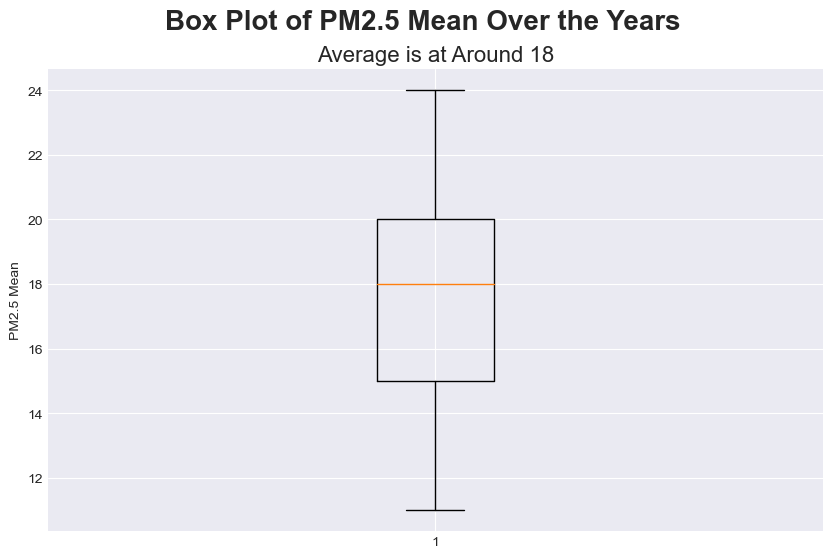

In [108]:
# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df1['pm2.5_mean'])
plt.ylabel('PM2.5 Mean')
plt.suptitle('Box Plot of PM2.5 Mean Over the Years', fontsize= 20, fontweight='bold')
plt.title('Average is at Around 18', fontsize=16)
plt.show()



<h1>Graphing</h1>

In [109]:
plt.style.use('seaborn-v0_8-darkgrid')

<h3>ScatterPlot of Particulate Distributions over the Years</h3>
<li>It is good to know distribution of the 5 key diseases as it helps in understanding the patterns and trends of diseases within a Singapore.</li>
<li>From the trend below it also shows that the Mean particulate matter is dropping over the years being a good sign for us</li>


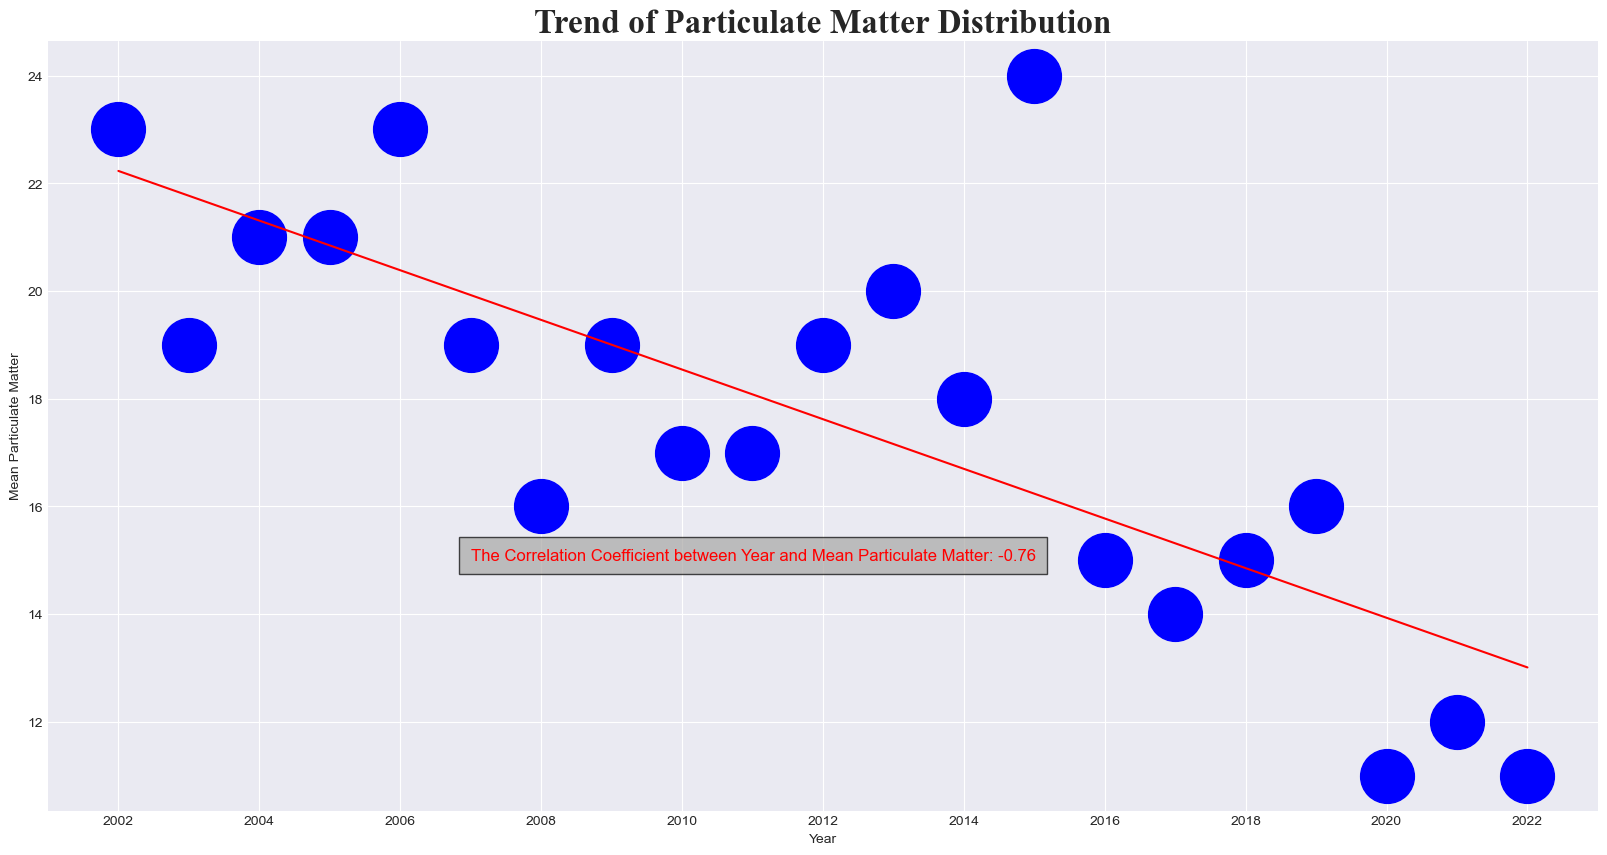

In [110]:

x = df1.index
y = df1['pm2.5_mean']

# Scatter Plot
plt.figure(1,figsize=(20,10))
plt.title("Trend of Particulate Matter Distribution", fontsize=24, fontweight='bold', fontname='Times New Roman')
plt.ylabel("Mean Particulate Matter")
plt.xlabel("Year")

plt.scatter(x, y, color="blue",s=1500)
plt.xticks(np.arange(2002, 2023, 2))

# Linear fit
m, b = np.polyfit(x, y, deg=1)
plt.plot(x, m*x + b, 'r-')

# Calculate correlation coefficient
corr_coefficient = np.corrcoef(x, y)[0, 1]

# Add correlation coefficient to the plot
plt.text(2007, 15, f'The Correlation Coefficient between Year and Mean Particulate Matter: {corr_coefficient:.2f}', color='Red',bbox={'facecolor':'#A8A7A5', 'alpha':0.7, 'pad':8},fontsize=12)

plt.show()


<h3>Distribution of Discharge for each Disease over the years</h3>

<li>Knowing the trend of particulate matter is very important as it allows us to make Health Impact Assessment as Long-term exposure to high levels of PM causes various respiratory and cardiovascular diseases.</li>
<li>From the trend below it also shows that the Mean particulate matter is dropping over the years being a good sign for us</li>



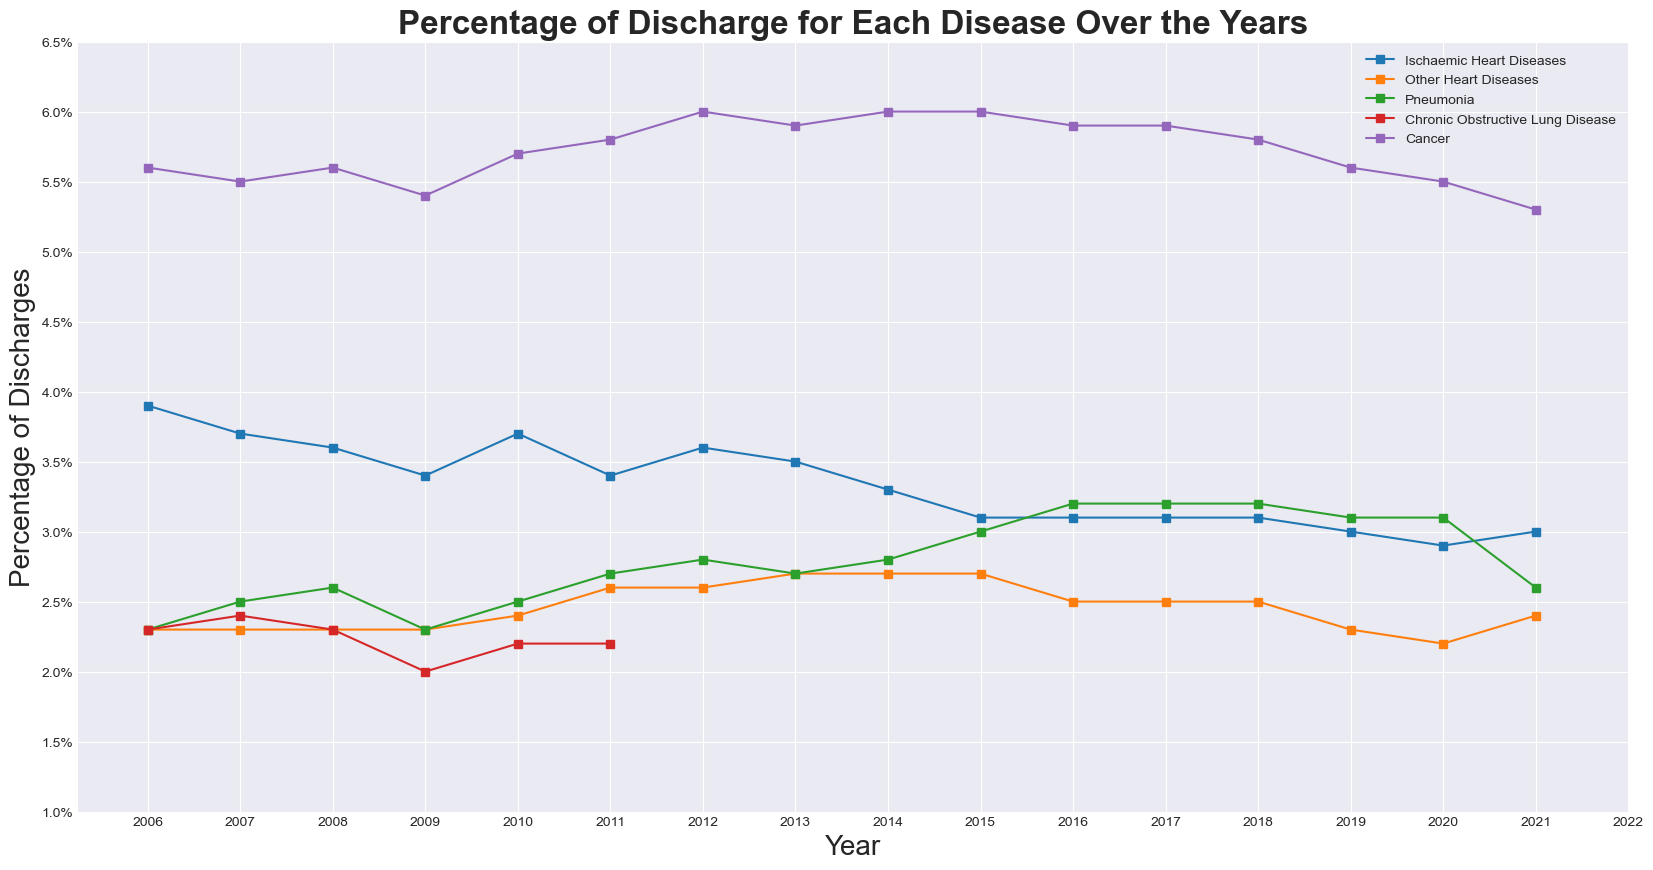

In [111]:

plt.style.use('seaborn-v0_8-darkgrid')
# Data points of line 1
x1 = ischaemic_heart_diseases_df.index
y1 = ischaemic_heart_diseases_df['percentage_discharges']

# Data points of line 2
x2 = other_heart_diseases_df.index
y2 = other_heart_diseases_df['percentage_discharges']

# Data points of line 3
x3 = pneumonia_df.index
y3 = pneumonia_df['percentage_discharges']

# Data points of line 4
x4 = copd_df.index
y4 = copd_df['percentage_discharges']

# Data points of line 5
x5 = cancer_df.index
y5 = cancer_df['percentage_discharges']

# Set a larger figure size for a longer plot
plt.figure(figsize=(20, 10))

plt.plot(x1, y1, label='Ischaemic Heart Diseases', marker='s')
plt.plot(x2, y2, label='Other Heart Diseases', marker='s')
plt.plot(x3, y3, label='Pneumonia', marker='s')
plt.plot(x4, y4, label='Chronic Obstructive Lung Disease', marker='s')
plt.plot(x5, y5, label='Cancer', marker='s')

# Adding legend, x and y labels, and titles for the lines
plt.legend()
plt.xlabel('Year',fontsize=20)
plt.xticks(np.arange(2006, 2023, 1))

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x}%'))
plt.ylabel('Percentage of Discharges',fontsize=20)
plt.yticks(np.arange(1, 7, 0.5))

plt.title('Percentage of Discharge for Each Disease Over the Years', fontsize=24, fontweight='bold')

# Displaying the plot
plt.show()

<h3>Distribution of the Dataset Diseases</h3>

<li>Now we are seeing the distribution of the Diseases Composition in 2012 and 2022.</li>

<li>this shows valuable information that cancer is no longer as prevalent in 2022 and ischaemic heart diseases is now more prevalent then before.</li>


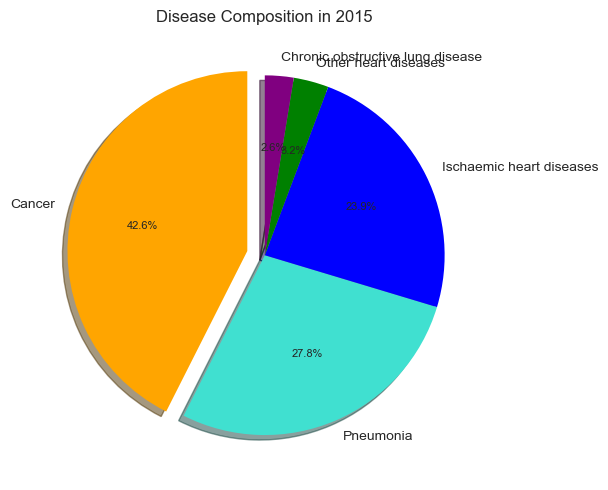

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = df3[df3['year'] == 2015]
# df10 = df3[df3['year'] == 2022]

df3 = df2[df2['disease_condition'].isin(['Pneumonia','Ischaemic heart diseases','Other heart diseases','Chronic obstructive lung disease','Cancer'])]
# df11 = df10[df10['disease_condition'].isin(['Pneumonia','Ischaemic heart diseases','Other heart diseases','Chronic obstructive lung disease','Cancer'])]

labels = df3['disease_condition']
values = df3['percentage_deaths']

# labels1 = df11['disease_condition']
# values1 = df11['percentage_deaths']

colors = ['#FFA500', 'turquoise','blue','green','purple']

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 5))


axes.set_title("Disease Composition in 2015")
wedges, texts, autotexts = axes.pie(values, explode=[0.1, 0, 0, 0, 0], labels=labels, autopct='%1.1f%%',
                                     colors=colors, shadow=True, startangle=90)
plt.setp(autotexts, ha='center', va='center', fontsize=8)

# axes[1].set_title("Disease Composition in 2022")
# wedges, texts, autotexts = axes[1].pie(values1, labels=labels1, autopct='%1.1f%%',
#                                      colors=colors, shadow=True, startangle=90, labeldistance=1.1)
# plt.setp(autotexts, ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [113]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df2 = df3[df3['year'] == 2012]
# df10 = df3[df3['year'] == 2022]

# df3 = df2[df2['disease_condition'].isin(['Pneumonia','Ischaemic heart diseases','Other heart diseases','Chronic obstructive lung disease','Cancer'])]
# df11 = df10[df10['disease_condition'].isin(['Pneumonia','Ischaemic heart diseases','Other heart diseases','Chronic obstructive lung disease','Cancer'])]

# labels = df3['disease_condition']
# values = df3['percentage_deaths']

# labels1 = df11['disease_condition']
# values1 = df11['percentage_deaths']

# colors = ['#FFA500', 'turquoise','blue','green','purple']

# Create subplots
# fig, axes = plt.subplots(1, 2, figsize=(20, 9))


# axes[0].set_title("Disease Composition in 2012")
# wedges, texts, autotexts = axes[0].pie(values, explode=[0.1, 0, 0, 0, 0], labels=labels, autopct='%1.1f%%',
#                                      colors=colors, shadow=True, startangle=90)
# plt.setp(autotexts, ha='center', va='center', fontsize=8)

# axes[1].set_title("Disease Composition in 2022")
# wedges, texts, autotexts = axes[1].pie(values1, labels=labels1, autopct='%1.1f%%',
#                                      colors=colors, shadow=True, startangle=90, labeldistance=1.1)
# plt.setp(autotexts, ha='center', va='center', fontsize=10)

# plt.tight_layout()
# plt.show()

<h3>Trend in particulate matter and deaths over the Years</h3>
<li>Firstly since this 2 Datasets are not normal and are of different values before plotting it i have normalized both the dataset as its easier to compare and analyze their relationships.
</li>
<li>but here we can see that as particulate matter decreases Death per year increases, even though there seem to be a good relationships here it can be other factors affecting it.</li>

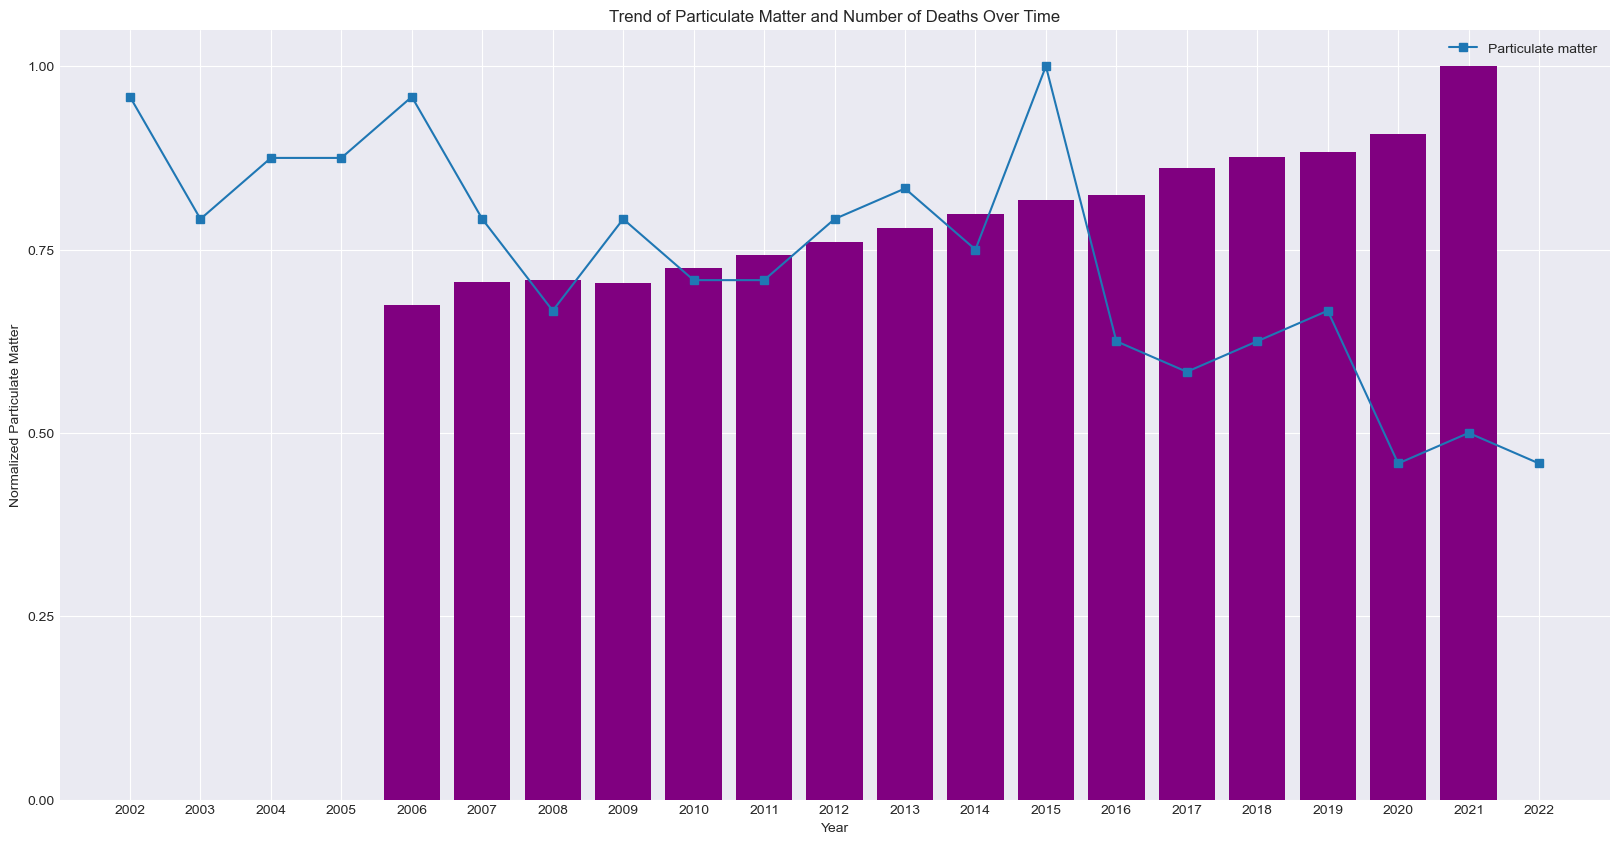

In [114]:
plt.figure(figsize=(20, 10))

# Convert the 'value' column to numeric
result_df['no_of_deaths'] = pd.to_numeric(result_df['no_of_deaths'], errors='coerce')

# Normalize the datasets
normalized_pm = df1['pm2.5_mean'] / df1['pm2.5_mean'].max()
normalized_deaths = result_df['no_of_deaths'] / result_df['no_of_deaths'].max()

# Plotting[]
plt.bar(result_df.index, normalized_deaths, color='purple')
plt.plot(df1.index, normalized_pm, label='Particulate matter', marker='s')

plt.yticks(np.arange(0, 1.1, 0.25)) 

plt.xlabel('Year')
plt.ylabel('Normalized Particulate Matter')
plt.title('Trend of Particulate Matter and Number of Deaths Over Time')

plt.xticks(np.arange(2002, 2023, 1))

# Show legend
plt.legend()

# Show the plot
plt.show()

<h3>Comparative Diseases Discharge over the Years</h3>
<li>This bar chart shows that over the years Cancer has the highest Discahrges if all the selected Diease
</li>
<li>We can also see that Ischaemic Heart Dieases has reduced percentages overtime 
</li>
<li>These can be vital information </li>

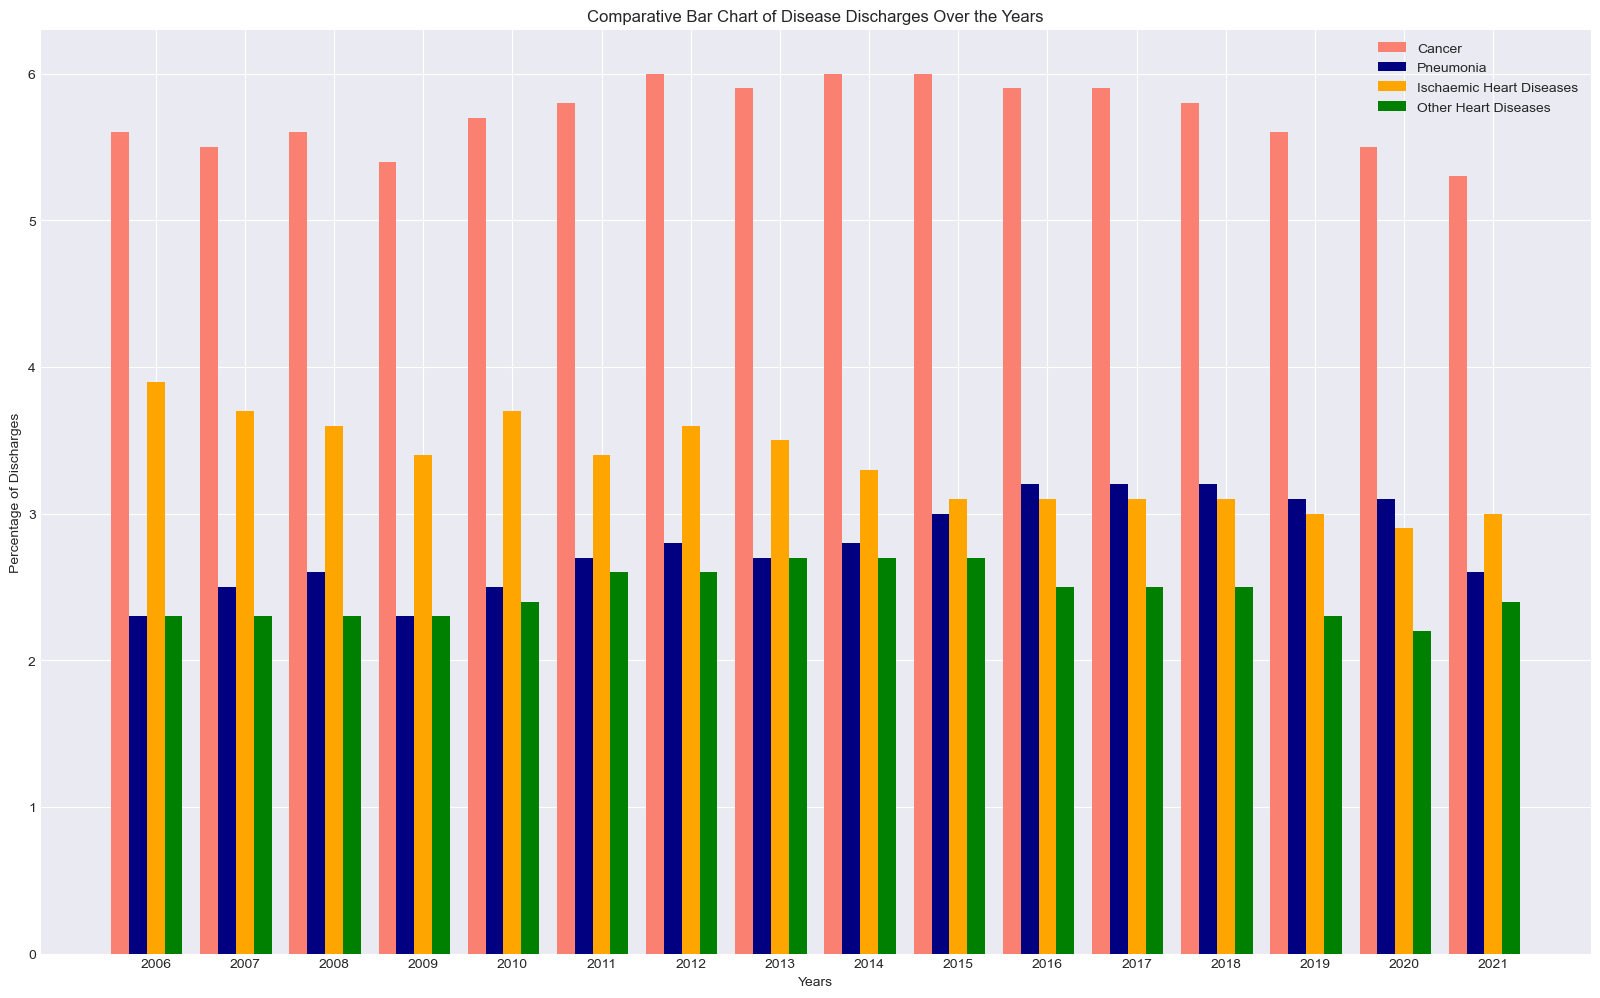

In [115]:
year = cancer_df.index
cancer = cancer_df['percentage_discharges']
pneumonia = pneumonia_df['percentage_discharges']
ischaemic_heart_diseases = ischaemic_heart_diseases_df['percentage_discharges']
other_heart_diseases = other_heart_diseases_df['percentage_discharges']

plt.figure(figsize=(20, 12))

bar_width = 0.2  # Adjust the bar width based on the number of bars

bar_pos1 = range(len(year))
bar_pos2 = [pos + bar_width for pos in bar_pos1]
bar_pos3 = [pos + bar_width for pos in bar_pos2]
bar_pos4 = [pos + bar_width for pos in bar_pos3]

# Plotting the bars
plt.bar(bar_pos1, cancer, width=bar_width, label='Cancer', color='salmon')
plt.bar(bar_pos2, pneumonia, width=bar_width, label='Pneumonia', color='navy')
plt.bar(bar_pos3, ischaemic_heart_diseases, width=bar_width, label='Ischaemic Heart Diseases', color='orange')
plt.bar(bar_pos4, other_heart_diseases, width=bar_width, label='Other Heart Diseases', color='green')

plt.xlabel('Years')
plt.ylabel('Percentage of Discharges')
plt.title('Comparative Bar Chart of Disease Discharges Over the Years')
plt.xticks([pos + bar_width*2 for pos in bar_pos1], year)
plt.legend()
plt.show()


<h1>Conclusion</h1>
In conclusion i have understood that particulate matter may be a cause in different adverse health conditions not limited to the 5 i have presented, but nonetheless a serious matter at hand, from the charts we cannot confirm nor deny that particulate matter directly affects Singaporeans health. But we can confirm it plays a role in it.